# Assignment_6_Logistic_Regression

Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")
Attribute information For bank dataset

   # Input variables:
    bank client data:
   #1 - age (numeric)
   #2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   #3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   #4 - education (categorical: "unknown","secondary","primary","tertiary")
   #5 - default: has credit in default? (binary: "yes","no")
   #6 - balance: average yearly balance, in euros (numeric) 
   #7 - housing: has housing loan? (binary: "yes","no")
   #8 - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
   #9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  #10 - day: last contact day of the month (numeric)
  #11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  #12 - duration: last contact duration, in seconds (numeric)
    other attributes:
  #13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  #14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  #15 - previous: number of contacts performed before this campaign and for this client (numeric)
  #16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  # Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None


In [26]:
import pandas as pd

In [27]:
import pandas as pd
df = pd.read_csv("D:\\Data Science\\Assignments\\bank-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [28]:
df.drop(["marital","month","poutcome"], axis=1,inplace=True)

In [29]:
df.columns

Index(['age', 'job', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [30]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   contact    45211 non-null  object
 8   day        45211 non-null  int64 
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  y          45211 non-null  object
dtypes: int64(7), object(7)
memory usage: 4.8+ MB


In [31]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [32]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
df['job'] = LE.fit_transform(df['job'])
df['education'] = LE.fit_transform(df['education'])
df['default'] = LE.fit_transform(df['default'])
df['housing'] = LE.fit_transform(df['housing'])
df['loan'] = LE.fit_transform(df['loan'])
df['contact'] = LE.fit_transform(df['contact'])
df['y'] = LE.fit_transform(df['y'])

In [33]:
# replacing values
#df["default"]=df["default"].replace({'yes':1, 'no':0})
#df["housing"]=df["housing"].replace({'yes':1, 'no':0})
#df["loan"]=df["loan"].replace({'yes':1, 'no':0})
#df["loan"]=df["loan"].replace({'yes':1, 'no':0})
#df["y"]=df["y"].replace({'yes':1, 'no':0})

In [34]:
df.describe()

,age,job,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3.272657,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,11.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [35]:
df.shape

(45211, 14)

In [36]:
df.corr()

,age,job,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
age,1.000000,-0.021868,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
job,-0.021868,1.000000,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,0.004744,0.006839,-0.024455,-0.000911,0.040438
education,-0.106807,0.166707,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,0.001935,0.006255,0.000052,0.017570,0.066241
default,-0.017879,-0.006853,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,0.018232,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.125363,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,-0.033004,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
contact,0.026221,-0.082063,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,-0.020839,0.019614,-0.244816,-0.147811,-0.148395
day,-0.009120,0.022856,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.004744,0.001935,-0.010021,0.021560,0.005075,-0.012412,-0.020839,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521


In [37]:
df[df.duplicated()]

,age,job,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

# Model Building

In [39]:
# Dividing our data into input and output variables 
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
#print(X)
#print(Y)

In [40]:
from sklearn.linear_model import LogisticRegression
import pickle

In [41]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# save the model to disk
filename = "finalized_model.sav"
pickle.dump(classifier, open(filename,'wb'))

In [43]:
#Predict for X dataset
pickle.load(open(filename,'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier.predict(X)

In [44]:
y_pred_df = pd.DataFrame({'actual':Y, 'predicted_prob':classifier.predict(X)})

In [45]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


# Confusion Matrix for the model accuracy

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39176   746]
 [ 4327   962]]


In [47]:
((39176+962)/(39176+746+4327+962))

0.8877927937891221

# Classification Report

In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.18      0.27      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.61     45211
weighted avg       0.86      0.89      0.86     45211



# ROC Curve

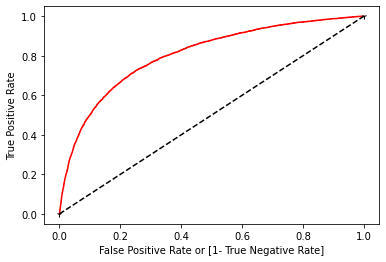

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])
auc= roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color = 'red', label='logit model(area = % 0.2f)' %auc)
plt.plot([0,1],[0,1], 'k--1')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel("True Positive Rate")
plt.show()

In [50]:
auc

0.5816002482966194